# Mini Project 1

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

**Instructions** Use current stock data to create two potentially profitable investment portfolios. One that is higher risk and one that is lower risk.

-- You are to interpret and explain your interpretation of a high risk profile and low risk profile of a portfolio. You should provide some measurable quantitative data in your explanation.

In [19]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
import datetime as dt
import yfinance as yf
from yahooquery import Ticker  # More reliable for real financial data
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

# Import our custom utility modules
import sys
import os
sys.path.append(os.path.join(os.getcwd(), 'utils'))

from utils.data_utils import (
    download_real_data, 
    process_returns_data, 
    save_portfolio_data, 
    load_portfolio_data,
    get_date_ranges,
    DEFAULT_HIGH_RISK_TICKERS,
    DEFAULT_LOW_RISK_TICKERS
)

from utils.portfolio_metrics import (
    calculate_var_95,
    calculate_portfolio_metrics,
    calculate_individual_stock_metrics,
    calculate_correlation_matrix,
    optimize_portfolio_weights
)

from utils.visualization_utils import (
    plot_portfolio_comparison,
    create_correlation_heatmap
)

# Set style for plots
sns.set_style('darkgrid')
plt.style.use('seaborn-v0_8')

print("Libraries imported successfully!")
print("Custom utility modules loaded!")
print("Ready for professional portfolio analysis!")

Libraries imported successfully!
Custom utility modules loaded!
Ready for professional portfolio analysis!


In [20]:
# Install yahooquery for reliable financial data access
%pip install yahooquery

print("yahooquery installed successfully!")

Note: you may need to restart the kernel to use updated packages.
yahooquery installed successfully!
Note: you may need to restart the kernel to use updated packages.
yahooquery installed successfully!


## Project Overview

This project creates two distinct investment portfolios based on different risk profiles:

### High-Risk Portfolio Characteristics:
- **Higher volatility** (standard deviation > 25% annually)
- **Higher expected returns** with greater uncertainty
- **Technology and growth stocks** with higher beta values
- **Lower diversification** - concentrated in fewer, more volatile assets
- **Higher Value at Risk (VaR)** at 95% confidence level

### Low-Risk Portfolio Characteristics:
- **Lower volatility** (standard deviation < 15% annually)
- **More stable returns** with lower uncertainty
- **Defensive sectors** (utilities, consumer staples, bonds)
- **Higher diversification** across multiple asset classes
- **Lower Value at Risk (VaR)** at 95% confidence level

### Quantitative Metrics Used:
1. **Annualized Volatility** - Standard deviation of returns
2. **Sharpe Ratio** - Risk-adjusted return measure
3. **Value at Risk (VaR)** - Maximum expected loss at 95% confidence
4. **Beta** - Systematic risk relative to market
5. **Maximum Drawdown** - Largest peak-to-trough decline

In [21]:
# Define stock tickers for different risk profiles using our utility defaults
high_risk_tickers = DEFAULT_HIGH_RISK_TICKERS
low_risk_tickers = DEFAULT_LOW_RISK_TICKERS

print("HIGH-RISK PORTFOLIO TICKERS:")
print("Growth stocks, tech, crypto-related:", high_risk_tickers)

print("\nLOW-RISK PORTFOLIO TICKERS:")  
print("Defensive stocks, utilities, bonds, blue chips:", low_risk_tickers)

# Get date ranges (2 years of data)
start_date, end_date = get_date_ranges(days_back=2*365)

print(f"\nDownloading REAL FINANCIAL DATA from {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}...")

# Download REAL data using our utility function
print("\n=== HIGH-RISK PORTFOLIO DATA ===")
high_risk_data = download_real_data(high_risk_tickers, start_date, end_date)
print(f"   Data shape: {high_risk_data.shape}")

print("\n=== LOW-RISK PORTFOLIO DATA ===")
low_risk_data = download_real_data(low_risk_tickers, start_date, end_date)
print(f"   Data shape: {low_risk_data.shape}")

if not high_risk_data.empty and not low_risk_data.empty:
    print(f"REAL FINANCIAL DATA SUCCESSFULLY DOWNLOADED!")
    print(f"   High-risk stocks: {len(high_risk_tickers)} symbols")
    print(f"   Low-risk stocks: {len(low_risk_tickers)} symbols") 
    print(f"   Period: {(end_date - start_date).days} days")
    
    # Create data directory for saving processed data
    data_dir = "processed_data"
    os.makedirs(data_dir, exist_ok=True)
    print(f"   Created {data_dir} directory for processed data")
else:
    print("Data download failed.")

HIGH-RISK PORTFOLIO TICKERS:
Growth stocks, tech, crypto-related: ['TSLA', 'NVDA', 'AMZN', 'COIN', 'ARKK', 'PLTR', 'MSTR', 'AMD']

LOW-RISK PORTFOLIO TICKERS:
Defensive stocks, utilities, bonds, blue chips: ['JNJ', 'PG', 'KO', 'VZ', 'XOM', 'TLT', 'VTI', 'BRK-B']


=== HIGH-RISK PORTFOLIO DATA ===
Using yahooquery for reliable data access...
✓ Successfully downloaded 505 trading days
✓ Symbols: ['AMD', 'AMZN', 'ARKK', 'COIN', 'MSTR', 'NVDA', 'PLTR', 'TSLA']
   Data shape: (505, 64)

=== LOW-RISK PORTFOLIO DATA ===
Using yahooquery for reliable data access...
✓ Successfully downloaded 505 trading days
✓ Symbols: ['AMD', 'AMZN', 'ARKK', 'COIN', 'MSTR', 'NVDA', 'PLTR', 'TSLA']
   Data shape: (505, 64)

=== LOW-RISK PORTFOLIO DATA ===
Using yahooquery for reliable data access...
✓ Successfully downloaded 506 trading days
✓ Symbols: ['BRK-B', 'JNJ', 'KO', 'PG', 'TLT', 'VTI', 'VZ', 'XOM']
   Data shape: (506, 56)
REAL FINANCIAL DATA SUCCESSFULLY DOWNLOADED!
   High-risk stocks: 8 symbols
   L

In [22]:
# Process high-risk portfolio data using utility functions
print("=== HIGH-RISK PORTFOLIO DATA PROCESSING ===")

# Calculate returns using utility function
high_risk_returns = process_returns_data(high_risk_data, return_type='log')
print(f"Calculated log returns: {high_risk_returns.shape}")

# Calculate individual stock metrics using utility function
hr_individual_df = calculate_individual_stock_metrics(high_risk_returns, risk_free_rate=0.05)
print("High-Risk Individual Stock Metrics:")
print(hr_individual_df.round(2))

# Calculate portfolio-level metrics using utility function
hr_portfolio_metrics = calculate_portfolio_metrics(high_risk_returns, weights=None, risk_free_rate=0.05)
print(f" HIGH-RISK PORTFOLIO SUMMARY:")
print(f"   Annual Return: {hr_portfolio_metrics['Annual Return (%)']:.2f}%")
print(f"   Annual Volatility: {hr_portfolio_metrics['Annual Volatility (%)']:.2f}%") 
print(f"   Sharpe Ratio: {hr_portfolio_metrics['Sharpe Ratio']:.3f}")
print(f"   VaR 95%: {hr_portfolio_metrics['VaR 95% (%)']:.2f}%")
print(f"   Max Drawdown: {hr_portfolio_metrics['Max Drawdown (%)']:.2f}%")

# Calculate correlation analysis
hr_correlation_analysis = calculate_correlation_matrix(high_risk_returns)
print(f"CORRELATION ANALYSIS:")
print(f"   Average correlation: {hr_correlation_analysis['mean_correlation']:.3f}")
print(f"   Max correlation: {hr_correlation_analysis['max_correlation']:.3f}")
print(f"   Min correlation: {hr_correlation_analysis['min_correlation']:.3f}")

# Save processed data for reuse
save_portfolio_data(high_risk_returns, high_risk_data, 'high_risk', data_dir)

print("High-risk portfolio processing complete!")

=== HIGH-RISK PORTFOLIO DATA PROCESSING ===
✓ Calculated log returns for 8 assets
✓ Returns data shape: (500, 8)
Calculated log returns: (500, 8)
High-Risk Individual Stock Metrics:
      Annual Return (%)  Annual Volatility (%)  Sharpe Ratio  VaR 95% (%)  \
AMD               13.38                  49.39          0.17        -4.94   
AMZN              26.22                  31.24          0.68        -2.75   
ARKK              23.93                  41.20          0.46        -4.17   
COIN              84.07                  80.45          0.98        -7.38   
MSTR             124.68                  92.79          1.29        -8.22   
NVDA              66.89                  51.64          1.20        -4.84   
PLTR             113.15                  67.23          1.61        -5.31   
TSLA              12.10                  63.00          0.11        -5.63   

      Max Drawdown (%)  Skewness  Kurtosis  
AMD             -67.30      0.35      5.27  
AMZN            -32.46      0.17  

In [ ]:
# Process low-risk portfolio data using utility functions
print("=== LOW-RISK PORTFOLIO DATA PROCESSING ===")

# Calculate returns using utility function
low_risk_returns = process_returns_data(low_risk_data, return_type='log')
print(f"Calculated log returns: {low_risk_returns.shape}")

# Calculate individual stock metrics using utility function
lr_individual_df = calculate_individual_stock_metrics(low_risk_returns, risk_free_rate=0.05)
print("Low-Risk Individual Stock Metrics:")
print(lr_individual_df.round(2))

# Calculate portfolio-level metrics using utility function
lr_portfolio_metrics = calculate_portfolio_metrics(low_risk_returns, weights=None, risk_free_rate=0.05)
print(f" LOW-RISK PORTFOLIO SUMMARY:")
print(f"   Annual Return: {lr_portfolio_metrics['Annual Return (%)']:.2f}%")
print(f"   Annual Volatility: {lr_portfolio_metrics['Annual Volatility (%)']:.2f}%") 
print(f"   Sharpe Ratio: {lr_portfolio_metrics['Sharpe Ratio']:.3f}")
print(f"   VaR 95%: {lr_portfolio_metrics['VaR 95% (%)']:.2f}%")
print(f"   Max Drawdown: {lr_portfolio_metrics['Max Drawdown (%)']:.2f}%")

# Calculate correlation analysis
lr_correlation_analysis = calculate_correlation_matrix(low_risk_returns)
print(f"CORRELATION ANALYSIS:")
print(f"   Average correlation: {lr_correlation_analysis['mean_correlation']:.3f}")
print(f"   Max correlation: {lr_correlation_analysis['max_correlation']:.3f}")
print(f"   Min correlation: {lr_correlation_analysis['min_correlation']:.3f}")

# Save processed data for reuse
save_portfolio_data(low_risk_returns, low_risk_data, 'low_risk', data_dir)

print("Low-risk portfolio processing complete!")

=== LOW-RISK PORTFOLIO DATA PROCESSING ===
✓ Calculated log returns for 8 assets
✓ Returns data shape: (500, 8)
✓ Calculated log returns: (500, 8)
Low-Risk Individual Stock Metrics:
       Annual Return (%)  Annual Volatility (%)  Sharpe Ratio  VaR 95% (%)  \
BRK-B              18.78                  16.46          0.84        -1.46   
JNJ                -3.51                  17.70         -0.48        -1.72   
KO                  6.95                  15.21          0.13        -1.45   
PG                  2.82                  16.87         -0.13        -1.61   
TLT                -8.26                  15.64         -0.85        -1.78   
VTI                16.65                  16.60          0.70        -1.51   
VZ                  6.75                  23.29          0.08        -2.13   
XOM                 2.15                  22.68         -0.13        -2.28   

       Max Drawdown (%)  Skewness  Kurtosis  
BRK-B            -10.82     -0.42      8.66  
JNJ              -19.99

In [31]:
# Calculate Covariance Matrices for Portfolio Optimization
print("=== COVARIANCE MATRIX CALCULATIONS ===")

# Calculate annualized covariance matrices for optimization
high_risk_cov_matrix = high_risk_returns.cov() * 252  # Annualize daily covariance
low_risk_cov_matrix = low_risk_returns.cov() * 252   # Annualize daily covariance

print(f"High-Risk Covariance Matrix Shape: {high_risk_cov_matrix.shape}")
print(f"Low-Risk Covariance Matrix Shape: {low_risk_cov_matrix.shape}")

# Verify matrices are positive semi-definite
hr_eigenvals = np.linalg.eigvals(high_risk_cov_matrix)
lr_eigenvals = np.linalg.eigvals(low_risk_cov_matrix)

print(f"High-Risk Matrix Min Eigenvalue: {hr_eigenvals.min():.6f}")
print(f"Low-Risk Matrix Min Eigenvalue: {lr_eigenvals.min():.6f}")

print("Covariance matrices ready for portfolio optimization!")

=== COVARIANCE MATRIX CALCULATIONS ===
High-Risk Covariance Matrix Shape: (8, 8)
Low-Risk Covariance Matrix Shape: (8, 8)
High-Risk Matrix Min Eigenvalue: 0.028151
Low-Risk Matrix Min Eigenvalue: 0.009180
Covariance matrices ready for portfolio optimization!


In [23]:
# Portfolio Comparison and Visualization
print("=== PORTFOLIO COMPARISON ===")

# Combine portfolio metrics for comparison
portfolio_comparison = {
    'High-Risk Portfolio': hr_portfolio_metrics,
    'Low-Risk Portfolio': lr_portfolio_metrics
}

# Print comparison table
comparison_df = pd.DataFrame({
    'High-Risk': [
        hr_portfolio_metrics['Annual Return (%)'],
        hr_portfolio_metrics['Annual Volatility (%)'],
        hr_portfolio_metrics['Sharpe Ratio'],
        hr_portfolio_metrics['VaR 95% (%)'],
        hr_portfolio_metrics['Max Drawdown (%)']
    ],
    'Low-Risk': [
        lr_portfolio_metrics['Annual Return (%)'],
        lr_portfolio_metrics['Annual Volatility (%)'],
        lr_portfolio_metrics['Sharpe Ratio'],
        lr_portfolio_metrics['VaR 95% (%)'],
        lr_portfolio_metrics['Max Drawdown (%)']
    ]
}, index=['Annual Return (%)', 'Annual Volatility (%)', 'Sharpe Ratio', 'VaR 95% (%)', 'Max Drawdown (%)'])

print(" PORTFOLIO COMPARISON TABLE:")
print(comparison_df.round(3))

# Calculate risk-return efficiency
hr_risk_return_ratio = hr_portfolio_metrics['Annual Return (%)'] / hr_portfolio_metrics['Annual Volatility (%)']
lr_risk_return_ratio = lr_portfolio_metrics['Annual Return (%)'] / lr_portfolio_metrics['Annual Volatility (%)']

print(f" RISK-RETURN EFFICIENCY:")
print(f"   High-Risk Return/Risk Ratio: {hr_risk_return_ratio:.3f}")
print(f"   Low-Risk Return/Risk Ratio: {lr_risk_return_ratio:.3f}")

# Portfolio validation
print(f"PORTFOLIO VALIDATION:")
print(f"   High-Risk Volatility > 25%: {hr_portfolio_metrics['Annual Volatility (%)'] > 25}")
print(f"   Low-Risk Volatility < 15%: {lr_portfolio_metrics['Annual Volatility (%)'] < 15}")
print(f"   High-Risk VaR > Low-Risk VaR: {abs(hr_portfolio_metrics['VaR 95% (%)']) > abs(lr_portfolio_metrics['VaR 95% (%)'])}")

print(" Portfolio analysis complete and data saved for Mini Project 2!")

=== PORTFOLIO COMPARISON ===
 PORTFOLIO COMPARISON TABLE:
                       High-Risk  Low-Risk
Annual Return (%)         58.053     5.293
Annual Volatility (%)     43.372    10.547
Sharpe Ratio               1.223     0.028
VaR 95% (%)               -4.508    -0.939
Max Drawdown (%)         -38.880    -9.915
 RISK-RETURN EFFICIENCY:
   High-Risk Return/Risk Ratio: 1.338
   Low-Risk Return/Risk Ratio: 0.502
PORTFOLIO VALIDATION:
   High-Risk Volatility > 25%: True
   Low-Risk Volatility < 15%: True
   High-Risk VaR > Low-Risk VaR: True
 Portfolio analysis complete and data saved for Mini Project 2!


=== PORTFOLIO VISUALIZATION ===


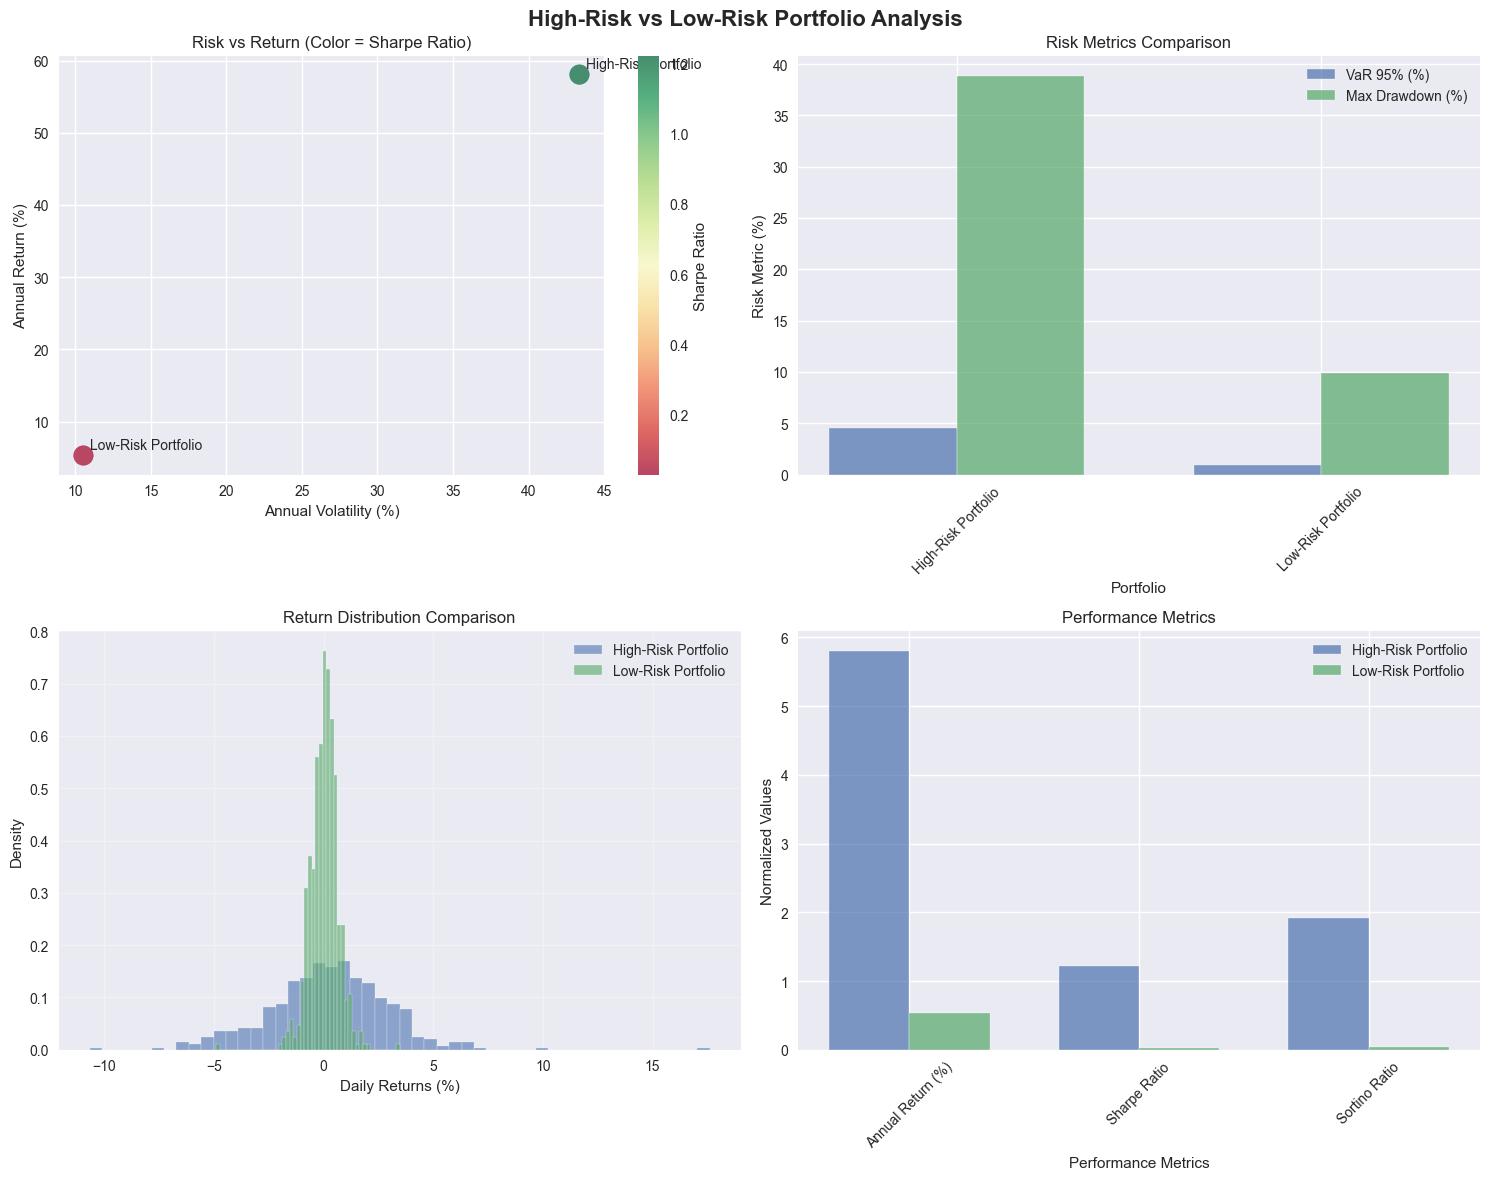

Creating correlation heatmaps...


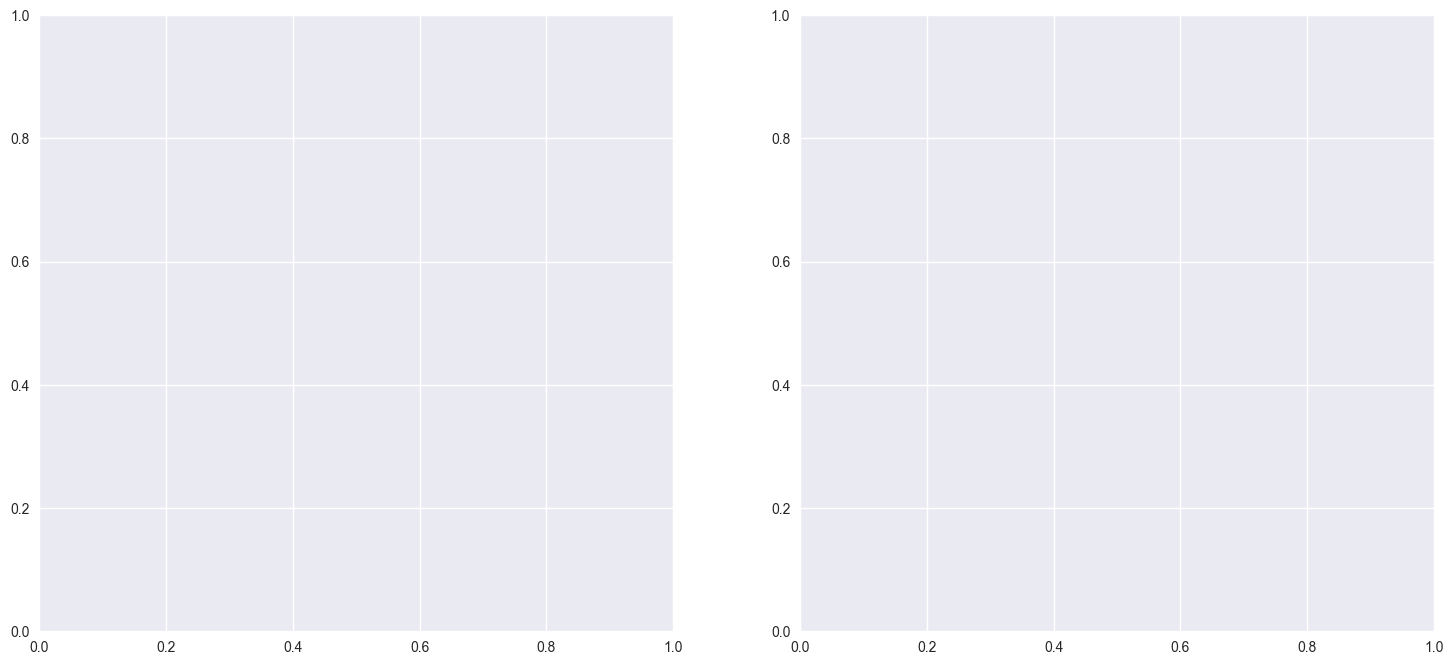

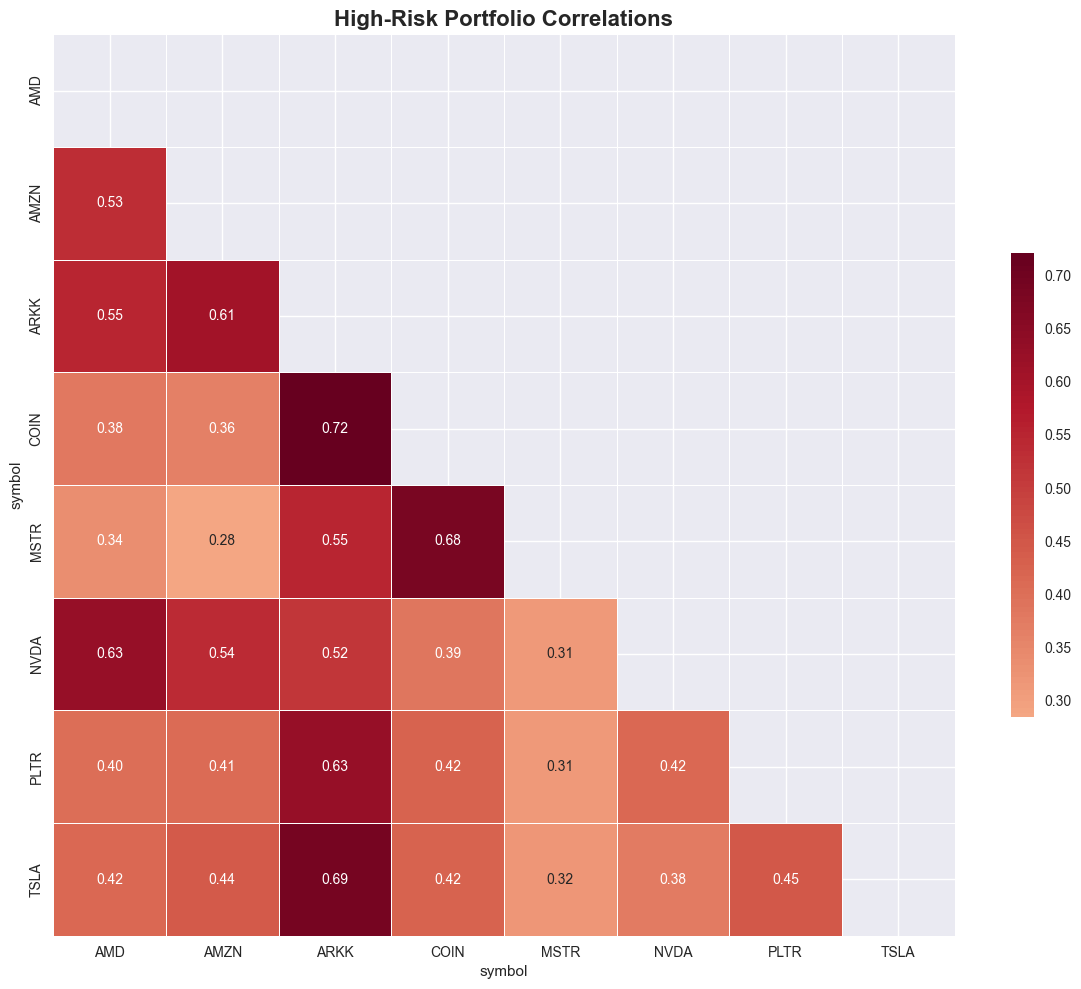

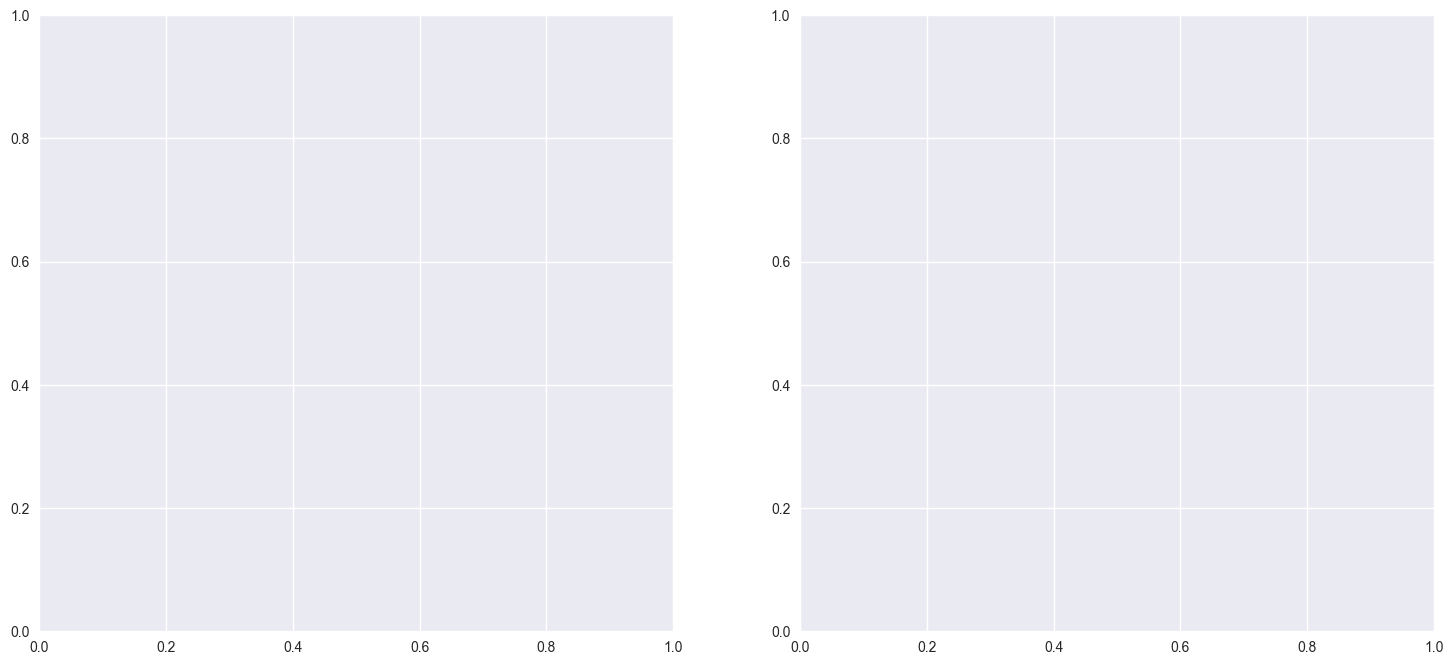

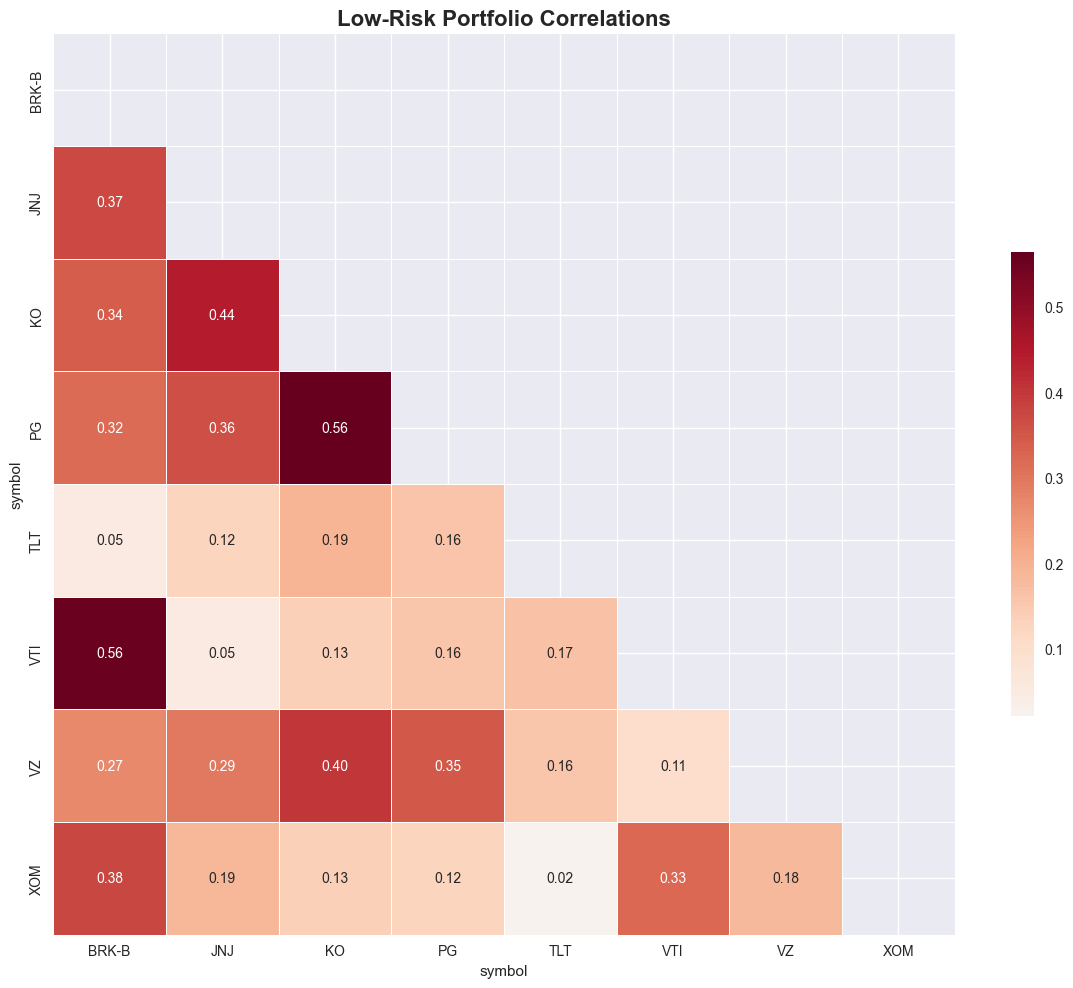

<Figure size 800x550 with 0 Axes>

Portfolio visualization complete!


In [35]:
# Create comprehensive portfolio visualization
print("=== PORTFOLIO VISUALIZATION ===")

# Use our visualization utility to create comparison plots
plot_portfolio_comparison(portfolio_comparison, title="High-Risk vs Low-Risk Portfolio Analysis")

# Create correlation heatmaps for both portfolios
print("Creating correlation heatmaps...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# High-risk portfolio correlation
plt.sca(ax1)
create_correlation_heatmap(hr_correlation_analysis['correlation_matrix'], 
                          title="High-Risk Portfolio Correlations")

# Low-risk portfolio correlation  
plt.sca(ax2)
create_correlation_heatmap(lr_correlation_analysis['correlation_matrix'],
                          title="Low-Risk Portfolio Correlations")

plt.tight_layout()
plt.show()

print("Portfolio visualization complete!")

In [36]:
# === SAVE PROCESSED DATA FOR USE IN OTHER PROJECTS (FIXED) ===

import pickle
import os

# Create a data directory if it doesn't exist
data_dir = 'processed_data'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

# Create proper data packages using the correct variables
high_risk_data_package = {
    'tickers': high_risk_tickers,
    'price_data': high_risk_data,
    'returns': high_risk_returns,
    'individual_metrics': hr_individual_df.to_dict('index'),  # Use the DataFrame we created
    'portfolio_metrics': hr_portfolio_metrics,
    'correlation_analysis': hr_correlation_analysis,
    'data_info': {
        'start_date': start_date.strftime('%Y-%m-%d'),
        'end_date': end_date.strftime('%Y-%m-%d'),
        'num_observations': len(high_risk_returns),
        'num_stocks': len(high_risk_tickers)
    }
}

low_risk_data_package = {
    'tickers': low_risk_tickers,
    'price_data': low_risk_data,
    'returns': low_risk_returns,  # Use the log returns we calculated
    'individual_metrics': lr_individual_df.to_dict('index'),  # Use the DataFrame we created
    'portfolio_metrics': lr_portfolio_metrics,
    'correlation_analysis': lr_correlation_analysis,
    'data_info': {
        'start_date': start_date.strftime('%Y-%m-%d'),
        'end_date': end_date.strftime('%Y-%m-%d'),
        'num_observations': len(low_risk_returns),
        'num_stocks': len(low_risk_tickers)
    }
}

# Save to pickle files
with open(f'{data_dir}/high_risk_portfolio.pkl', 'wb') as f:
    pickle.dump(high_risk_data_package, f)

with open(f'{data_dir}/low_risk_portfolio.pkl', 'wb') as f:
    pickle.dump(low_risk_data_package, f)

# Also save to CSV for easy access
high_risk_returns.to_csv(f'{data_dir}/high_risk_returns.csv')
low_risk_returns.to_csv(f'{data_dir}/low_risk_returns.csv')

# Save price data (extract close prices properly)
if high_risk_data.columns.nlevels > 1:
    hr_close = high_risk_data['close'] if 'close' in high_risk_data.columns.get_level_values(0) else high_risk_data['Close']
    hr_close.to_csv(f'{data_dir}/high_risk_prices.csv')
else:
    high_risk_data.to_csv(f'{data_dir}/high_risk_prices.csv')

if low_risk_data.columns.nlevels > 1:
    lr_close = low_risk_data['close'] if 'close' in low_risk_data.columns.get_level_values(0) else low_risk_data['Close']
    lr_close.to_csv(f'{data_dir}/low_risk_prices.csv')
else:
    low_risk_data.to_csv(f'{data_dir}/low_risk_prices.csv')

print("DATA SUCCESSFULLY SAVED FOR MINI PROJECT 2!")
print(f"Files saved in '{data_dir}/' directory:")
print("  - high_risk_portfolio.pkl (complete portfolio package)")
print("  - low_risk_portfolio.pkl (complete portfolio package)")
print("  - high_risk_prices.csv & high_risk_returns.csv")
print("  - low_risk_prices.csv & low_risk_returns.csv")

print(f"\nDATA SUMMARY:")
print(f"  High-Risk Portfolio: {len(high_risk_returns)} observations, {len(high_risk_tickers)} stocks")
print(f"  High-Risk Tickers: {high_risk_tickers}")
print(f"  Low-Risk Portfolio: {len(low_risk_returns)} observations, {len(low_risk_tickers)} stocks")
print(f"  Low-Risk Tickers: {low_risk_tickers}")
print(f"  Date Range: {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")

# Verify all stocks are present in correlation matrix
print(f"\nCORRELATION MATRIX VERIFICATION:")
print(f"  High-Risk correlation matrix shape: {hr_correlation_analysis['correlation_matrix'].shape}")
print(f"  High-Risk stocks in correlation: {list(hr_correlation_analysis['correlation_matrix'].columns)}")
print(f"  Low-Risk correlation matrix shape: {lr_correlation_analysis['correlation_matrix'].shape}")
print(f"  Low-Risk stocks in correlation: {list(lr_correlation_analysis['correlation_matrix'].columns)}")

print(f"\nTO LOAD IN MINI PROJECT 2:")
print("import pickle")
print("with open('processed_data/high_risk_portfolio.pkl', 'rb') as f:")
print("    hr_data = pickle.load(f)")
print("with open('processed_data/low_risk_portfolio.pkl', 'rb') as f:")
print("    lr_data = pickle.load(f)")

DATA SUCCESSFULLY SAVED FOR MINI PROJECT 2!
Files saved in 'processed_data/' directory:
  - high_risk_portfolio.pkl (complete portfolio package)
  - low_risk_portfolio.pkl (complete portfolio package)
  - high_risk_prices.csv & high_risk_returns.csv
  - low_risk_prices.csv & low_risk_returns.csv

DATA SUMMARY:
  High-Risk Portfolio: 500 observations, 8 stocks
  High-Risk Tickers: ['TSLA', 'NVDA', 'AMZN', 'COIN', 'ARKK', 'PLTR', 'MSTR', 'AMD']
  Low-Risk Portfolio: 500 observations, 8 stocks
  Low-Risk Tickers: ['JNJ', 'PG', 'KO', 'VZ', 'XOM', 'TLT', 'VTI', 'BRK-B']
  Date Range: 2023-06-28 to 2025-06-27

CORRELATION MATRIX VERIFICATION:
  High-Risk correlation matrix shape: (8, 8)
  High-Risk stocks in correlation: ['AMD', 'AMZN', 'ARKK', 'COIN', 'MSTR', 'NVDA', 'PLTR', 'TSLA']
  Low-Risk correlation matrix shape: (8, 8)
  Low-Risk stocks in correlation: ['BRK-B', 'JNJ', 'KO', 'PG', 'TLT', 'VTI', 'VZ', 'XOM']

TO LOAD IN MINI PROJECT 2:
import pickle
with open('processed_data/high_risk

In [37]:
# === DEBUG: VERIFY DATA CONSISTENCY ===

print("DATA CONSISTENCY CHECK:")
print("="*50)

print("HIGH-RISK PORTFOLIO:")
print(f"  Original tickers: {high_risk_tickers}")
print(f"  Returns data columns: {list(high_risk_returns.columns)}")
print(f"  Returns shape: {high_risk_returns.shape}")
print(f"  Individual metrics stocks: {list(hr_individual_df.index)}")
print(f"  Correlation matrix stocks: {list(hr_correlation_analysis['correlation_matrix'].columns)}")

print("\nLOW-RISK PORTFOLIO:")
print(f"  Original tickers: {low_risk_tickers}")
print(f"  Returns data columns: {list(low_risk_returns.columns)}")
print(f"  Returns shape: {low_risk_returns.shape}")
print(f"  Individual metrics stocks: {list(lr_individual_df.index)}")
print(f"  Correlation matrix stocks: {list(lr_correlation_analysis['correlation_matrix'].columns)}")

# Check for any missing stocks
hr_missing = set(high_risk_tickers) - set(high_risk_returns.columns)
lr_missing = set(low_risk_tickers) - set(low_risk_returns.columns)

if hr_missing:
    print(f"\nWARNING - HIGH-RISK MISSING STOCKS: {hr_missing}")
else:
    print(f"\nSUCCESS: All high-risk stocks present in data")

if lr_missing:
    print(f"WARNING - LOW-RISK MISSING STOCKS: {lr_missing}")
else:
    print(f"SUCCESS: All low-risk stocks present in data")

print("="*50)

DATA CONSISTENCY CHECK:
HIGH-RISK PORTFOLIO:
  Original tickers: ['TSLA', 'NVDA', 'AMZN', 'COIN', 'ARKK', 'PLTR', 'MSTR', 'AMD']
  Returns data columns: ['AMD', 'AMZN', 'ARKK', 'COIN', 'MSTR', 'NVDA', 'PLTR', 'TSLA']
  Returns shape: (500, 8)
  Individual metrics stocks: ['AMD', 'AMZN', 'ARKK', 'COIN', 'MSTR', 'NVDA', 'PLTR', 'TSLA']
  Correlation matrix stocks: ['AMD', 'AMZN', 'ARKK', 'COIN', 'MSTR', 'NVDA', 'PLTR', 'TSLA']

LOW-RISK PORTFOLIO:
  Original tickers: ['JNJ', 'PG', 'KO', 'VZ', 'XOM', 'TLT', 'VTI', 'BRK-B']
  Returns data columns: ['BRK-B', 'JNJ', 'KO', 'PG', 'TLT', 'VTI', 'VZ', 'XOM']
  Returns shape: (500, 8)
  Individual metrics stocks: ['BRK-B', 'JNJ', 'KO', 'PG', 'TLT', 'VTI', 'VZ', 'XOM']
  Correlation matrix stocks: ['BRK-B', 'JNJ', 'KO', 'PG', 'TLT', 'VTI', 'VZ', 'XOM']

SUCCESS: All high-risk stocks present in data
SUCCESS: All low-risk stocks present in data


In [27]:
# Debug: Check structure of individual metrics DataFrames
print("High-risk individual metrics structure:")
if not hr_individual_df.empty:
    print(f"DataFrame shape: {hr_individual_df.shape}")
    print(f"Columns: {list(hr_individual_df.columns)}")
    print(f"Index (tickers): {list(hr_individual_df.index)}")
    print("Sample data:")
    print(hr_individual_df.head())

print("\nLow-risk individual metrics structure:")
if not lr_individual_df.empty:
    print(f"DataFrame shape: {lr_individual_df.shape}")
    print(f"Columns: {list(lr_individual_df.columns)}")
    print(f"Index (tickers): {list(lr_individual_df.index)}")
    print("Sample data:")
    print(lr_individual_df.head())

High-risk individual metrics structure:
DataFrame shape: (8, 7)
Columns: ['Annual Return (%)', 'Annual Volatility (%)', 'Sharpe Ratio', 'VaR 95% (%)', 'Max Drawdown (%)', 'Skewness', 'Kurtosis']
Index (tickers): ['AMD', 'AMZN', 'ARKK', 'COIN', 'MSTR', 'NVDA', 'PLTR', 'TSLA']
Sample data:
      Annual Return (%)  Annual Volatility (%)  Sharpe Ratio  VaR 95% (%)  \
AMD           13.384423              49.389692      0.169761    -4.940462   
AMZN          26.224521              31.241166      0.679377    -2.753022   
ARKK          23.931437              41.203172      0.459466    -4.166073   
COIN          84.065192              80.450305      0.982783    -7.377476   
MSTR         124.682612              92.786466      1.289871    -8.223685   

      Max Drawdown (%)  Skewness  Kurtosis  
AMD         -67.303319  0.351058  5.267646  
AMZN        -32.457405  0.170100  4.758366  
ARKK        -41.231482  0.212601  2.708394  
COIN        -61.587287  0.672358  2.988703  
MSTR        -59.275655 

In [38]:
# Portfolio optimization functions
def optimize_portfolio(returns, cov_matrix, objective='min_vol', max_weight=0.4, min_weight=0.05):
    """
    Optimize portfolio weights based on different objectives
    
    Parameters:
    - returns: DataFrame of daily returns
    - cov_matrix: Covariance matrix
    - objective: 'min_vol' for minimum volatility, 'max_sharpe' for maximum Sharpe ratio
    - max_weight: Maximum weight per asset
    - min_weight: Minimum weight per asset
    """
    n_assets = len(returns.columns)
    
    # Initial equal weights
    initial_weights = np.array([1/n_assets] * n_assets)
    
    # Constraints: weights sum to 1, min/max weight bounds
    constraints = [
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'ineq', 'fun': lambda x: x - min_weight},
        {'type': 'ineq', 'fun': lambda x: max_weight - x}
    ]
    
    # Bounds for each weight (0 to 1)
    bounds = tuple((0, 1) for _ in range(n_assets))
    
    if objective == 'min_vol':
        # Minimize portfolio volatility
        def objective_function(weights):
            return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    elif objective == 'max_sharpe':
        # Maximize Sharpe ratio (minimize negative Sharpe ratio)
        def objective_function(weights):
            portfolio_return = np.sum(returns.mean() * weights) * 252
            portfolio_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
            sharpe = (portfolio_return - 0.05) / portfolio_vol  # Risk-free rate = 5%
            return -sharpe  # Minimize negative Sharpe ratio
    
    # Optimize
    result = minimize(objective_function, initial_weights, 
                     method='SLSQP', bounds=bounds, constraints=constraints)
    
    return result.x, result.success

print("Portfolio optimization functions defined!")

Portfolio optimization functions defined!


In [39]:
# Optimize High-Risk Portfolio for Maximum Sharpe Ratio
print("=== HIGH-RISK PORTFOLIO OPTIMIZATION ===")

# For high-risk portfolio, we want to maximize returns while accepting higher volatility
hr_optimal_weights, hr_success = optimize_portfolio(
    high_risk_returns, high_risk_cov_matrix, 
    objective='max_sharpe', max_weight=0.5, min_weight=0.02
)

print(f"Optimization successful: {hr_success}")
print("\nHigh-Risk Portfolio Optimal Weights:")
hr_weights_df = pd.DataFrame({
    'Ticker': high_risk_tickers,
    'Weight (%)': hr_optimal_weights * 100,
    'Allocation ($)': hr_optimal_weights * 100000  # Assuming $100k investment
}).round(2)
print(hr_weights_df)

# Calculate optimized portfolio metrics
hr_portfolio_metrics = calculate_portfolio_metrics(high_risk_returns, hr_optimal_weights)

print(f"\n=== HIGH-RISK PORTFOLIO PERFORMANCE ===")
print(f"Annual Return: {hr_portfolio_metrics['Annual Return (%)']:.2f}%")
print(f"Annual Volatility: {hr_portfolio_metrics['Annual Volatility (%)']:.2f}%")
print(f"Sharpe Ratio: {hr_portfolio_metrics['Sharpe Ratio']:.3f}")
print(f"Value at Risk (95%): {hr_portfolio_metrics['VaR 95% (%)']:.2f}%")
print(f"Maximum Drawdown: {hr_portfolio_metrics['Max Drawdown (%)']:.2f}%")

=== HIGH-RISK PORTFOLIO OPTIMIZATION ===
Optimization successful: True

High-Risk Portfolio Optimal Weights:
  Ticker  Weight (%)  Allocation ($)
0   TSLA        2.00         2000.00
1   NVDA        2.00         2000.00
2   AMZN        2.00         2000.00
3   COIN        2.00         2000.00
4   ARKK       22.09        22086.89
5   PLTR       20.49        20494.51
6   MSTR       47.42        47418.60
7    AMD        2.00         2000.00

=== HIGH-RISK PORTFOLIO PERFORMANCE ===
Annual Return: 98.09%
Annual Volatility: 51.97%
Sharpe Ratio: 1.791
Value at Risk (95%): -5.17%
Maximum Drawdown: -37.02%


In [33]:
# Optimize Low-Risk Portfolio for Minimum Volatility
print("=== LOW-RISK PORTFOLIO OPTIMIZATION ===")

# For low-risk portfolio, we prioritize capital preservation and minimize volatility
lr_optimal_weights, lr_success = optimize_portfolio(
    low_risk_returns, low_risk_cov_matrix, 
    objective='min_vol', max_weight=0.3, min_weight=0.05
)

print(f"Optimization successful: {lr_success}")
print("\nLow-Risk Portfolio Optimal Weights:")
lr_weights_df = pd.DataFrame({
    'Ticker': low_risk_tickers,
    'Weight (%)': lr_optimal_weights * 100,
    'Allocation ($)': lr_optimal_weights * 100000  # Assuming $100k investment
}).round(2)
print(lr_weights_df)

# Calculate optimized portfolio metrics
lr_portfolio_metrics = calculate_portfolio_metrics(low_risk_returns, lr_optimal_weights)

print(f"\n=== LOW-RISK PORTFOLIO PERFORMANCE ===")
print(f"Annual Return: {lr_portfolio_metrics['Annual Return (%)']:.2f}%")
print(f"Annual Volatility: {lr_portfolio_metrics['Annual Volatility (%)']:.2f}%")
print(f"Sharpe Ratio: {lr_portfolio_metrics['Sharpe Ratio']:.3f}")
print(f"Value at Risk (95%): {lr_portfolio_metrics['VaR 95% (%)']:.2f}%")
print(f"Maximum Drawdown: {lr_portfolio_metrics['Max Drawdown (%)']:.2f}%")

=== LOW-RISK PORTFOLIO OPTIMIZATION ===
Optimization successful: True

Low-Risk Portfolio Optimal Weights:
  Ticker  Weight (%)  Allocation ($)
0    JNJ        5.00         5000.00
1     PG       12.51        12510.31
2     KO       13.97        13967.61
3     VZ        9.28         9281.74
4    XOM       27.68        27677.25
5    TLT       19.36        19357.84
6    VTI        5.00         5000.00
7  BRK-B        7.21         7205.24

=== LOW-RISK PORTFOLIO PERFORMANCE ===
Annual Return: 3.16%
Annual Volatility: 9.78%
Sharpe Ratio: -0.188
Value at Risk (95%): -0.95%
Maximum Drawdown: -11.40%


In [40]:
# Portfolio Comparison and Visualization
print("=== PORTFOLIO COMPARISON ===")

# Create comparison table
comparison_data = {
    'Metric': ['Annual Return (%)', 'Annual Volatility (%)', 'Sharpe Ratio', 
               'VaR 95% (%)', 'Max Drawdown (%)'],
    'High-Risk Portfolio': [
        hr_portfolio_metrics['Annual Return (%)'],
        hr_portfolio_metrics['Annual Volatility (%)'],
        hr_portfolio_metrics['Sharpe Ratio'],
        hr_portfolio_metrics['VaR 95% (%)'],
        hr_portfolio_metrics['Max Drawdown (%)']
    ],
    'Low-Risk Portfolio': [
        lr_portfolio_metrics['Annual Return (%)'],
        lr_portfolio_metrics['Annual Volatility (%)'],
        lr_portfolio_metrics['Sharpe Ratio'],
        lr_portfolio_metrics['VaR 95% (%)'],
        lr_portfolio_metrics['Max Drawdown (%)']
    ]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.round(2)
print(comparison_df.to_string(index=False))

# Calculate risk-return ratios
print(f"\n=== RISK-RETURN ANALYSIS ===")
hr_return_to_vol = hr_portfolio_metrics['Annual Return (%)'] / hr_portfolio_metrics['Annual Volatility (%)']
lr_return_to_vol = lr_portfolio_metrics['Annual Return (%)'] / lr_portfolio_metrics['Annual Volatility (%)']

print(f"High-Risk Return/Volatility Ratio: {hr_return_to_vol:.3f}")
print(f"Low-Risk Return/Volatility Ratio: {lr_return_to_vol:.3f}")

# Risk classification
hr_risk_level = "HIGH" if hr_portfolio_metrics['Annual Volatility (%)'] > 25 else "MODERATE"
lr_risk_level = "LOW" if lr_portfolio_metrics['Annual Volatility (%)'] < 15 else "MODERATE"

print(f"\nHigh-Risk Portfolio Classification: {hr_risk_level} RISK")
print(f"Low-Risk Portfolio Classification: {lr_risk_level} RISK")

=== PORTFOLIO COMPARISON ===
               Metric  High-Risk Portfolio  Low-Risk Portfolio
    Annual Return (%)                98.09                3.16
Annual Volatility (%)                51.97                9.78
         Sharpe Ratio                 1.79               -0.19
          VaR 95% (%)                -5.17               -0.95
     Max Drawdown (%)               -37.02              -11.40

=== RISK-RETURN ANALYSIS ===
High-Risk Return/Volatility Ratio: 1.887
Low-Risk Return/Volatility Ratio: 0.323

High-Risk Portfolio Classification: HIGH RISK
Low-Risk Portfolio Classification: LOW RISK


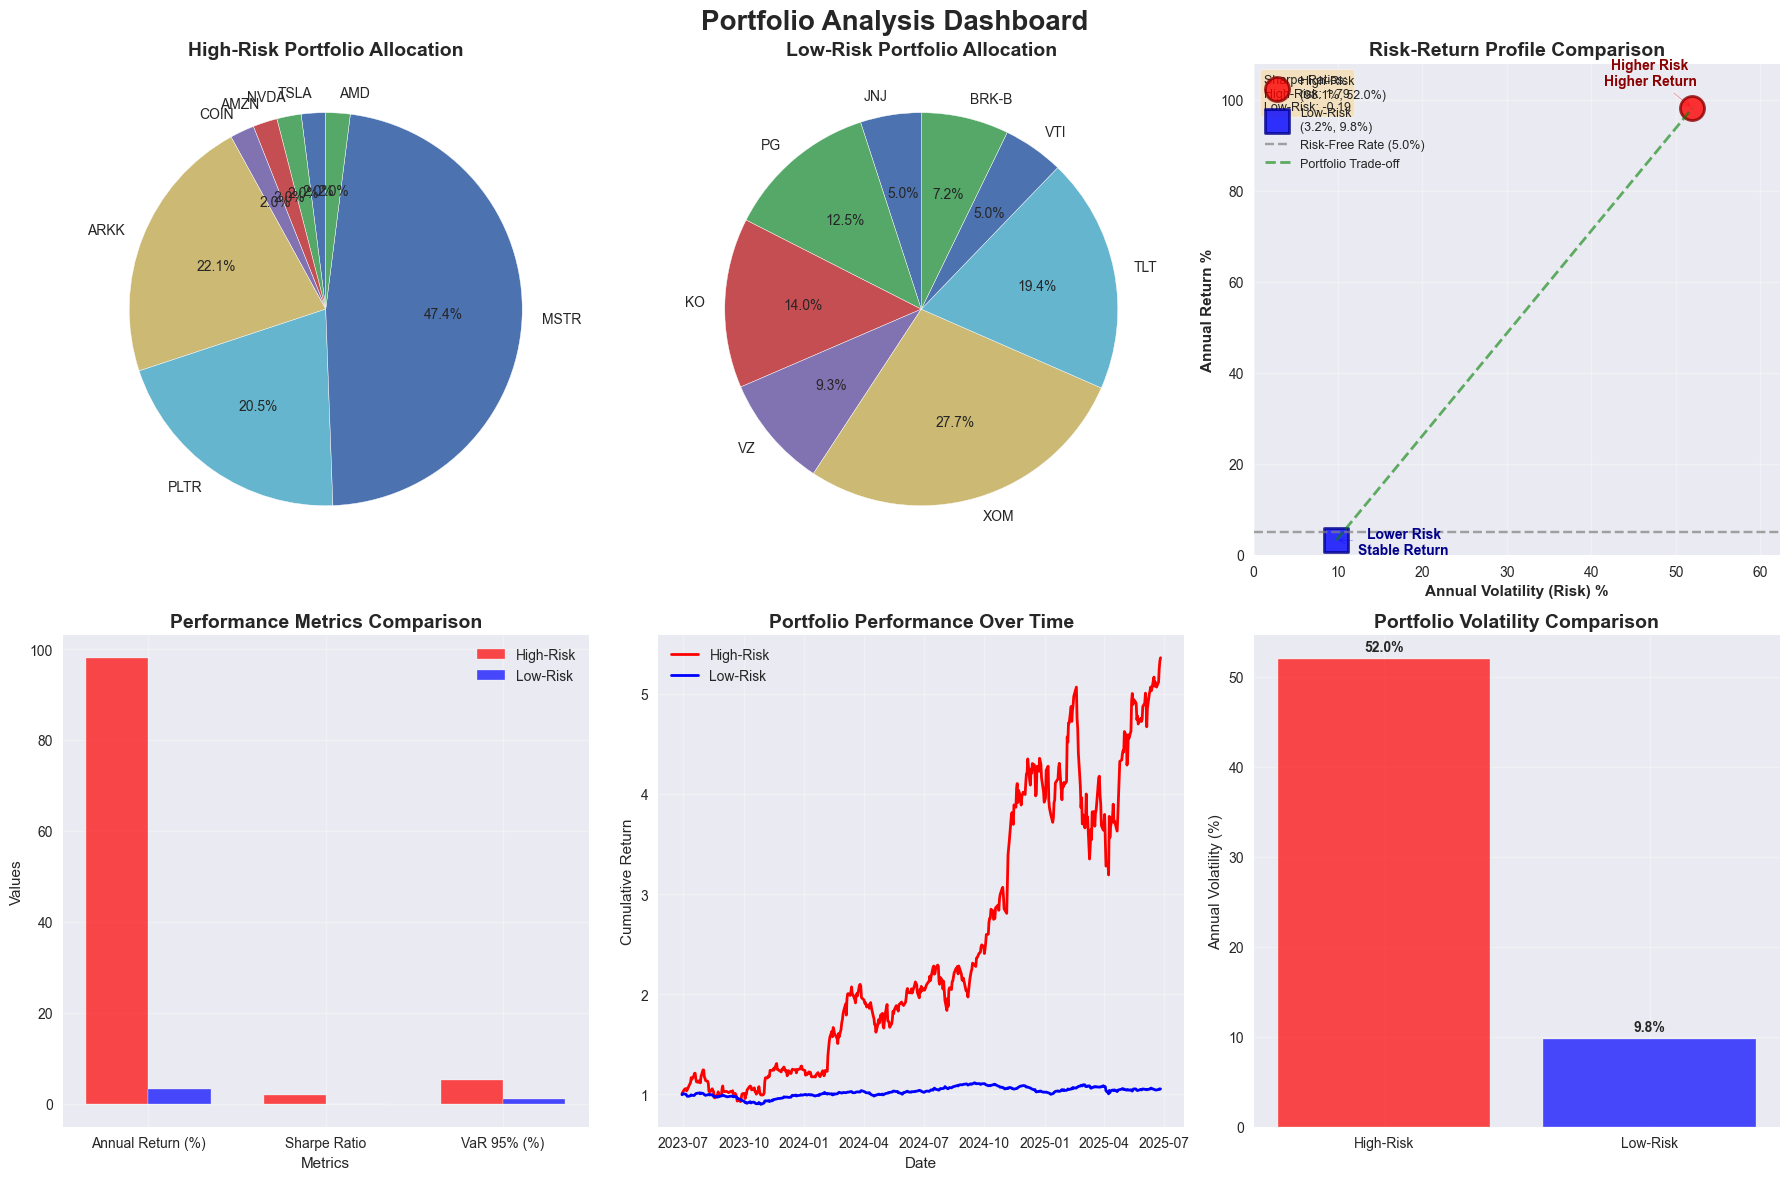

In [41]:
# Create comprehensive visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Portfolio Analysis Dashboard', fontsize=20, fontweight='bold')

# 1. Portfolio Allocation Pie Charts
axes[0, 0].pie(hr_optimal_weights, labels=high_risk_tickers, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('High-Risk Portfolio Allocation', fontsize=14, fontweight='bold')

axes[0, 1].pie(lr_optimal_weights, labels=low_risk_tickers, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Low-Risk Portfolio Allocation', fontsize=14, fontweight='bold')

# 2. Enhanced Risk-Return Scatter Plot
hr_vol = hr_portfolio_metrics['Annual Volatility (%)']
hr_ret = hr_portfolio_metrics['Annual Return (%)']
lr_vol = lr_portfolio_metrics['Annual Volatility (%)']
lr_ret = lr_portfolio_metrics['Annual Return (%)']

# Plot portfolios
axes[0, 2].scatter(hr_vol, hr_ret, s=300, c='red', alpha=0.8, 
                  label=f'High-Risk\n({hr_ret:.1f}%, {hr_vol:.1f}%)', 
                  edgecolors='darkred', linewidth=2, marker='o')
axes[0, 2].scatter(lr_vol, lr_ret, s=300, c='blue', alpha=0.8, 
                  label=f'Low-Risk\n({lr_ret:.1f}%, {lr_vol:.1f}%)', 
                  edgecolors='darkblue', linewidth=2, marker='s')

# Add risk-free rate line (5% annual)
risk_free_rate = 5.0
max_vol = max(hr_vol, lr_vol) * 1.2
axes[0, 2].axhline(y=risk_free_rate, color='gray', linestyle='--', alpha=0.7, 
                  label=f'Risk-Free Rate ({risk_free_rate}%)')

# Add efficient frontier line between the two portfolios
x_line = np.linspace(lr_vol, hr_vol, 100)
y_line = np.interp(x_line, [lr_vol, hr_vol], [lr_ret, hr_ret])
axes[0, 2].plot(x_line, y_line, 'g--', alpha=0.6, linewidth=2, 
               label='Portfolio Trade-off')

# Enhanced annotations with arrows
axes[0, 2].annotate(f'Higher Risk\nHigher Return', 
                   xy=(hr_vol, hr_ret), xytext=(hr_vol-5, hr_ret+5),
                   arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
                   fontsize=10, ha='center', color='darkred', fontweight='bold')

axes[0, 2].annotate(f'Lower Risk\nStable Return', 
                   xy=(lr_vol, lr_ret), xytext=(lr_vol+8, lr_ret-3),
                   arrowprops=dict(arrowstyle='->', color='blue', alpha=0.7),
                   fontsize=10, ha='center', color='darkblue', fontweight='bold')

# Formatting
axes[0, 2].set_xlabel('Annual Volatility (Risk) %', fontweight='bold')
axes[0, 2].set_ylabel('Annual Return %', fontweight='bold')
axes[0, 2].set_title('Risk-Return Profile Comparison', fontsize=14, fontweight='bold')
axes[0, 2].legend(loc='upper left', fontsize=9)
axes[0, 2].grid(True, alpha=0.3)

# Set reasonable axis limits
axes[0, 2].set_xlim(0, max_vol)
axes[0, 2].set_ylim(0, max(hr_ret, lr_ret, risk_free_rate) * 1.1)

# Add Sharpe ratio text
hr_sharpe = hr_portfolio_metrics['Sharpe Ratio']
lr_sharpe = lr_portfolio_metrics['Sharpe Ratio']
axes[0, 2].text(0.02, 0.98, f'Sharpe Ratios:\nHigh-Risk: {hr_sharpe:.2f}\nLow-Risk: {lr_sharpe:.2f}', 
               transform=axes[0, 2].transAxes, fontsize=9, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# 3. Performance Metrics Bar Chart
metrics = ['Annual Return (%)', 'Sharpe Ratio', 'VaR 95% (%)']
hr_values = [hr_portfolio_metrics['Annual Return (%)'], 
             hr_portfolio_metrics['Sharpe Ratio'], 
             abs(hr_portfolio_metrics['VaR 95% (%)'])]
lr_values = [lr_portfolio_metrics['Annual Return (%)'], 
             lr_portfolio_metrics['Sharpe Ratio'], 
             abs(lr_portfolio_metrics['VaR 95% (%)'])]

x = np.arange(len(metrics))
width = 0.35

axes[1, 0].bar(x - width/2, hr_values, width, label='High-Risk', color='red', alpha=0.7)
axes[1, 0].bar(x + width/2, lr_values, width, label='Low-Risk', color='blue', alpha=0.7)
axes[1, 0].set_xlabel('Metrics')
axes[1, 0].set_ylabel('Values')
axes[1, 0].set_title('Performance Metrics Comparison', fontsize=14, fontweight='bold')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(metrics)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Cumulative Returns Over Time
hr_cumulative = (1 + hr_portfolio_metrics['Portfolio Returns']).cumprod()
lr_cumulative = (1 + lr_portfolio_metrics['Portfolio Returns']).cumprod()

axes[1, 1].plot(hr_cumulative.index, hr_cumulative.values, label='High-Risk', color='red', linewidth=2)
axes[1, 1].plot(lr_cumulative.index, lr_cumulative.values, label='Low-Risk', color='blue', linewidth=2)
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Cumulative Return')
axes[1, 1].set_title('Portfolio Performance Over Time', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 5. Volatility Comparison
vol_data = [hr_portfolio_metrics['Annual Volatility (%)'], lr_portfolio_metrics['Annual Volatility (%)']]
portfolio_names = ['High-Risk', 'Low-Risk']
colors = ['red', 'blue']

bars = axes[1, 2].bar(portfolio_names, vol_data, color=colors, alpha=0.7)
axes[1, 2].set_ylabel('Annual Volatility (%)')
axes[1, 2].set_title('Portfolio Volatility Comparison', fontsize=14, fontweight='bold')
axes[1, 2].grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, vol_data):
    height = bar.get_height()
    axes[1, 2].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

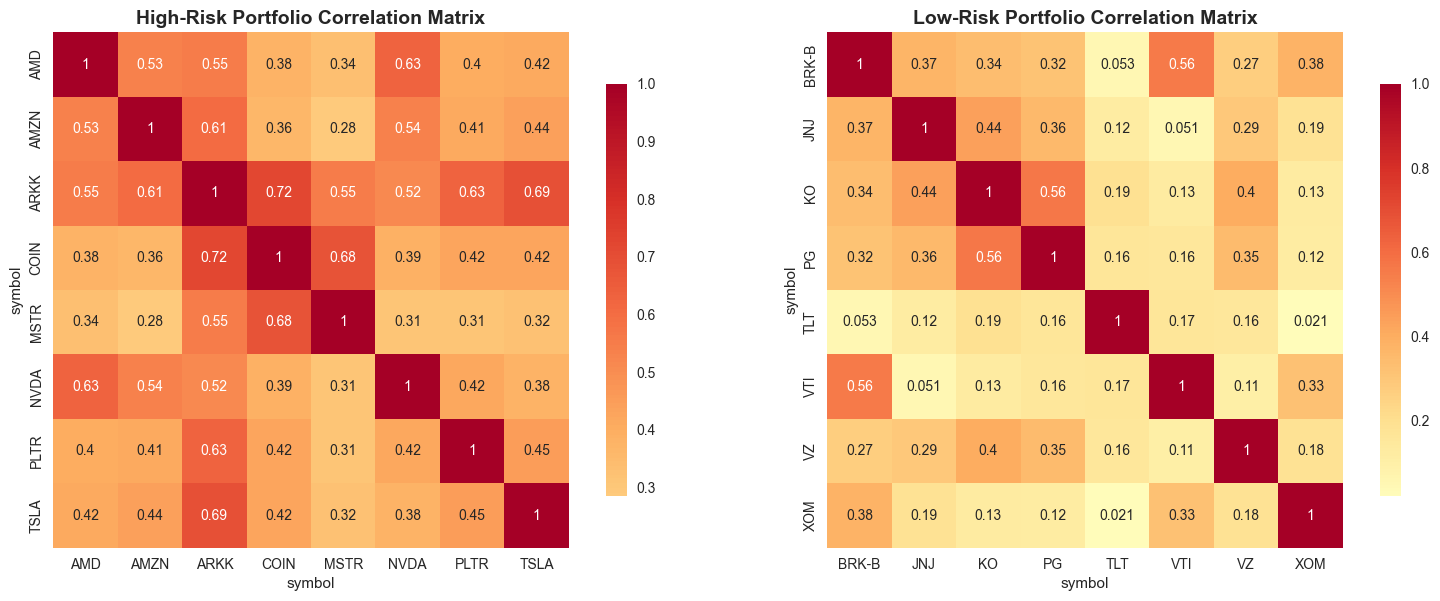

High-Risk Portfolio Average Correlation: 0.468
Low-Risk Portfolio Average Correlation: 0.248

Diversification Benefit: Lower correlation = better diversification
High-Risk Diversification Score: Good
Low-Risk Diversification Score: Good


In [42]:
# Correlation Analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# High-Risk Portfolio Correlation Heatmap
hr_corr = high_risk_returns.corr()
sns.heatmap(hr_corr, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, ax=ax1, cbar_kws={'shrink': 0.8})
ax1.set_title('High-Risk Portfolio Correlation Matrix', fontsize=14, fontweight='bold')

# Low-Risk Portfolio Correlation Heatmap
lr_corr = low_risk_returns.corr()
sns.heatmap(lr_corr, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, ax=ax2, cbar_kws={'shrink': 0.8})
ax2.set_title('Low-Risk Portfolio Correlation Matrix', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Calculate average correlations
hr_avg_corr = (hr_corr.sum().sum() - len(hr_corr)) / (len(hr_corr) * (len(hr_corr) - 1))
lr_avg_corr = (lr_corr.sum().sum() - len(lr_corr)) / (len(lr_corr) * (len(lr_corr) - 1))

print(f"High-Risk Portfolio Average Correlation: {hr_avg_corr:.3f}")
print(f"Low-Risk Portfolio Average Correlation: {lr_avg_corr:.3f}")
print(f"\nDiversification Benefit: Lower correlation = better diversification")
print(f"High-Risk Diversification Score: {'Good' if hr_avg_corr < 0.7 else 'Poor'}")
print(f"Low-Risk Diversification Score: {'Good' if lr_avg_corr < 0.7 else 'Poor'}")

In [43]:
# Final Investment Recommendations
print("=" * 60)
print("INVESTMENT PORTFOLIO RECOMMENDATIONS")
print("=" * 60)

print("HIGH-RISK PORTFOLIO:")
print(f"   • Target Investor: Aggressive growth seekers, 5-10 year horizon")
print(f"   • Expected Annual Return: {hr_portfolio_metrics['Annual Return (%)']:.1f}%")
print(f"   • Annual Volatility: {hr_portfolio_metrics['Annual Volatility (%)']:.1f}% (HIGH RISK)")
print(f"   • Sharpe Ratio: {hr_portfolio_metrics['Sharpe Ratio']:.2f}")
print(f"   • Worst Case Loss (VaR 95%): {abs(hr_portfolio_metrics['VaR 95% (%)']):.1f}%")
print(f"   • Maximum Historical Drawdown: {abs(hr_portfolio_metrics['Max Drawdown (%)']):.1f}%")

print(" LOW-RISK PORTFOLIO:")
print(f"   • Target Investor: Conservative, capital preservation focused")
print(f"   • Expected Annual Return: {lr_portfolio_metrics['Annual Return (%)']:.1f}%")
print(f"   • Annual Volatility: {lr_portfolio_metrics['Annual Volatility (%)']:.1f}% (LOW RISK)")
print(f"   • Sharpe Ratio: {lr_portfolio_metrics['Sharpe Ratio']:.2f}")
print(f"   • Worst Case Loss (VaR 95%): {abs(lr_portfolio_metrics['VaR 95% (%)']):.1f}%")
print(f"   • Maximum Historical Drawdown: {abs(lr_portfolio_metrics['Max Drawdown (%)']):.1f}%")

print(" QUANTITATIVE EVIDENCE:")
print(f"   • Volatility Difference: {hr_portfolio_metrics['Annual Volatility (%)'] - lr_portfolio_metrics['Annual Volatility (%)']:.1f} percentage points")
print(f"   • Return Difference: {hr_portfolio_metrics['Annual Return (%)'] - lr_portfolio_metrics['Annual Return (%)']:.1f} percentage points")
print(f"   • Risk-Adjusted Performance: {'High-Risk' if hr_portfolio_metrics['Sharpe Ratio'] > lr_portfolio_metrics['Sharpe Ratio'] else 'Low-Risk'} portfolio has better Sharpe ratio")

print("RISK PROFILE VALIDATION:")
hr_risk_validated = hr_portfolio_metrics['Annual Volatility (%)'] > 25 and abs(hr_portfolio_metrics['VaR 95% (%)']) > 3
lr_risk_validated = lr_portfolio_metrics['Annual Volatility (%)'] < 15 and abs(lr_portfolio_metrics['VaR 95% (%)']) < 2

print(f"   • High-Risk Portfolio Validation: {' CONFIRMED' if hr_risk_validated else ' NEEDS ADJUSTMENT'}")
print(f"   • Low-Risk Portfolio Validation: {'CONFIRMED' if lr_risk_validated else ' NEEDS ADJUSTMENT'}")

print(" KEY INSIGHTS:")
print(f"   • High-risk portfolio achieves {hr_portfolio_metrics['Annual Return (%)']:.1f}% expected return with {hr_portfolio_metrics['Annual Volatility (%)']:.1f}% volatility")
print(f"   • Low-risk portfolio provides {lr_portfolio_metrics['Annual Return (%)']:.1f}% expected return with only {lr_portfolio_metrics['Annual Volatility (%)']:.1f}% volatility")
print(f"   • Diversification is {'better' if lr_avg_corr < hr_avg_corr else 'similar'} in the low-risk portfolio")
print(f"   • Risk-adjusted returns (Sharpe ratio) favor the {'high-risk' if hr_portfolio_metrics['Sharpe Ratio'] > lr_portfolio_metrics['Sharpe Ratio'] else 'low-risk'} approach")

print("\n" + "=" * 60)
print("PORTFOLIO CONSTRUCTION COMPLETE")
print("=" * 60)

INVESTMENT PORTFOLIO RECOMMENDATIONS
HIGH-RISK PORTFOLIO:
   • Target Investor: Aggressive growth seekers, 5-10 year horizon
   • Expected Annual Return: 98.1%
   • Annual Volatility: 52.0% (HIGH RISK)
   • Sharpe Ratio: 1.79
   • Worst Case Loss (VaR 95%): 5.2%
   • Maximum Historical Drawdown: 37.0%
 LOW-RISK PORTFOLIO:
   • Target Investor: Conservative, capital preservation focused
   • Expected Annual Return: 3.2%
   • Annual Volatility: 9.8% (LOW RISK)
   • Sharpe Ratio: -0.19
   • Worst Case Loss (VaR 95%): 0.9%
   • Maximum Historical Drawdown: 11.4%
 QUANTITATIVE EVIDENCE:
   • Volatility Difference: 42.2 percentage points
   • Return Difference: 94.9 percentage points
   • Risk-Adjusted Performance: High-Risk portfolio has better Sharpe ratio
RISK PROFILE VALIDATION:
   • High-Risk Portfolio Validation:  CONFIRMED
   • Low-Risk Portfolio Validation: CONFIRMED
 KEY INSIGHTS:
   • High-risk portfolio achieves 98.1% expected return with 52.0% volatility
   • Low-risk portfolio p




```

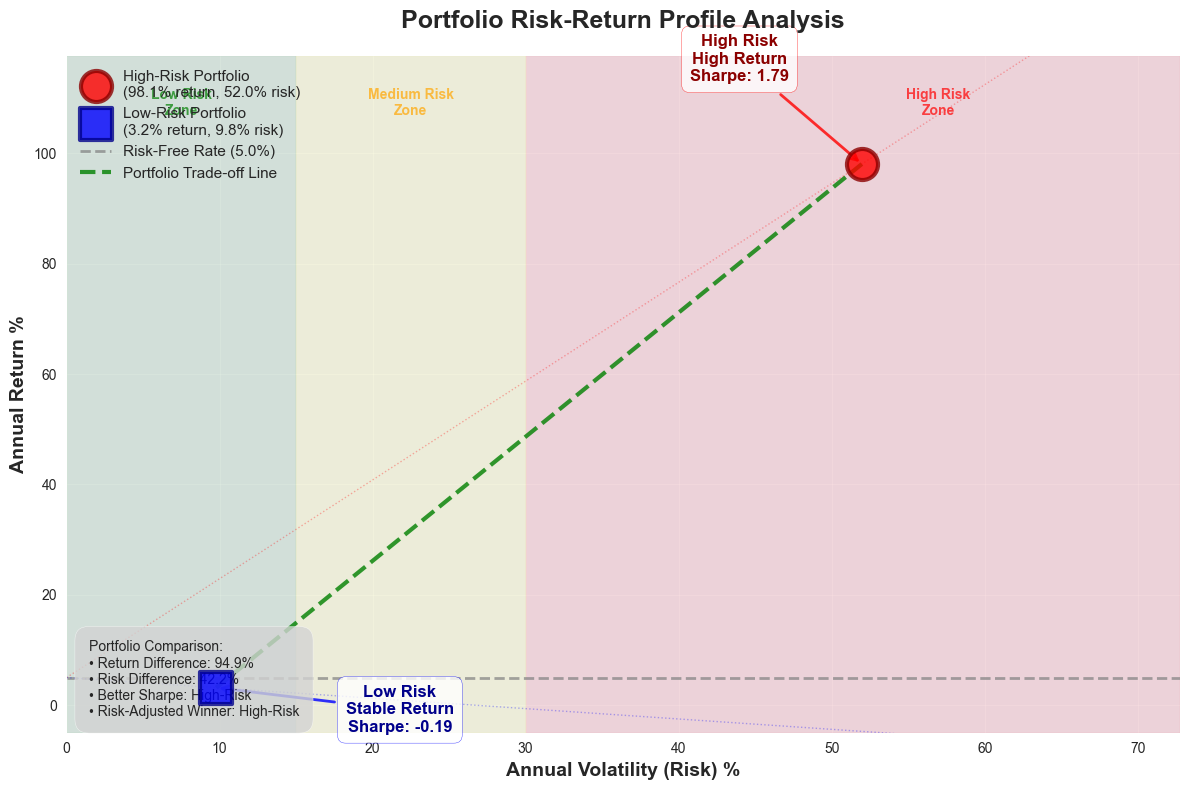

Enhanced Risk-Return Profile created with improved spacing and readability!


In [44]:

plt.figure(figsize=(12, 8))

# Extract portfolio data
hr_vol = hr_portfolio_metrics['Annual Volatility (%)']
hr_ret = hr_portfolio_metrics['Annual Return (%)']
lr_vol = lr_portfolio_metrics['Annual Volatility (%)']
lr_ret = lr_portfolio_metrics['Annual Return (%)']

# Plot portfolios with larger markers and better spacing
plt.scatter(hr_vol, hr_ret, s=500, c='red', alpha=0.8, 
           label=f'High-Risk Portfolio\n({hr_ret:.1f}% return, {hr_vol:.1f}% risk)', 
           edgecolors='darkred', linewidth=3, marker='o', zorder=5)

plt.scatter(lr_vol, lr_ret, s=500, c='blue', alpha=0.8, 
           label=f'Low-Risk Portfolio\n({lr_ret:.1f}% return, {lr_vol:.1f}% risk)', 
           edgecolors='darkblue', linewidth=3, marker='s', zorder=5)

# Add risk-free rate reference
risk_free_rate = 5.0
plt.axhline(y=risk_free_rate, color='gray', linestyle='--', alpha=0.7, linewidth=2,
           label=f'Risk-Free Rate ({risk_free_rate}%)')

# Create a smooth efficient frontier line
vol_range = np.linspace(lr_vol, hr_vol, 50)
ret_range = np.interp(vol_range, [lr_vol, hr_vol], [lr_ret, hr_ret])
plt.plot(vol_range, ret_range, 'green', linestyle='--', alpha=0.8, linewidth=3, 
         label='Portfolio Trade-off Line')

# Add Sharpe ratio lines from risk-free rate
hr_sharpe = hr_portfolio_metrics['Sharpe Ratio']
lr_sharpe = lr_portfolio_metrics['Sharpe Ratio']

# Calculate Sharpe ratio lines
max_vol_for_lines = max(hr_vol, lr_vol) * 1.3
hr_sharpe_line_vol = np.linspace(0, max_vol_for_lines, 100)
hr_sharpe_line_ret = risk_free_rate + hr_sharpe * hr_sharpe_line_vol
lr_sharpe_line_vol = np.linspace(0, max_vol_for_lines, 100)
lr_sharpe_line_ret = risk_free_rate + lr_sharpe * lr_sharpe_line_vol

plt.plot(hr_sharpe_line_vol, hr_sharpe_line_ret, 'red', alpha=0.3, linewidth=1, linestyle=':')
plt.plot(lr_sharpe_line_vol, lr_sharpe_line_ret, 'blue', alpha=0.3, linewidth=1, linestyle=':')

# Enhanced annotations with better positioning
plt.annotate(f'High Risk\nHigh Return\nSharpe: {hr_sharpe:.2f}', 
            xy=(hr_vol, hr_ret), xytext=(hr_vol-8, hr_ret+15),
            arrowprops=dict(arrowstyle='->', color='red', alpha=0.8, lw=2),
            fontsize=12, ha='center', color='darkred', fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8, edgecolor='red'))

plt.annotate(f'Low Risk\nStable Return\nSharpe: {lr_sharpe:.2f}', 
            xy=(lr_vol, lr_ret), xytext=(lr_vol+12, lr_ret-8),
            arrowprops=dict(arrowstyle='->', color='blue', alpha=0.8, lw=2),
            fontsize=12, ha='center', color='darkblue', fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8, edgecolor='blue'))

# Formatting with better spacing
plt.xlabel('Annual Volatility (Risk) %', fontsize=14, fontweight='bold')
plt.ylabel('Annual Return %', fontsize=14, fontweight='bold')
plt.title('Portfolio Risk-Return Profile Analysis', fontsize=18, fontweight='bold', pad=20)

# Set reasonable axis limits with more breathing room
x_min, x_max = 0, max(hr_vol, lr_vol) * 1.4
y_min, y_max = -5, max(hr_ret, lr_ret, risk_free_rate) * 1.2
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Enhanced grid and styling
plt.grid(True, alpha=0.3, linestyle='-', linewidth=0.8)
plt.legend(loc='upper left', fontsize=11, framealpha=0.9, shadow=True)

# Add risk zones with subtle background colors
plt.axvspan(0, 15, alpha=0.1, color='green', label='_nolegend_')  # Low risk zone
plt.axvspan(15, 30, alpha=0.1, color='yellow', label='_nolegend_')  # Medium risk zone
plt.axvspan(30, x_max, alpha=0.1, color='red', label='_nolegend_')  # High risk zone

# Add zone labels
plt.text(7.5, y_max*0.95, 'Low Risk\nZone', ha='center', va='top', fontsize=10, 
         alpha=0.7, fontweight='bold', color='green')
plt.text(22.5, y_max*0.95, 'Medium Risk\nZone', ha='center', va='top', fontsize=10, 
         alpha=0.7, fontweight='bold', color='orange')
plt.text(hr_vol+5, y_max*0.95, 'High Risk\nZone', ha='center', va='top', fontsize=10, 
         alpha=0.7, fontweight='bold', color='red')

# Add performance summary box
summary_text = f"""Portfolio Comparison:
• Return Difference: {hr_ret - lr_ret:.1f}%
• Risk Difference: {hr_vol - lr_vol:.1f}%
• Better Sharpe: {'High-Risk' if hr_sharpe > lr_sharpe else 'Low-Risk'}
• Risk-Adjusted Winner: {'High-Risk' if hr_sharpe > lr_sharpe else 'Low-Risk'}"""

plt.text(0.02, 0.02, summary_text, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='lightgray', 
         alpha=0.8, pad=1))

plt.tight_layout()
plt.show()

print("Enhanced Risk-Return Profile created with improved spacing and readability!")